# Building a Deep Convolutional Neural Network

## CNNs to improve accuracy in the case of image translation

In the previous sections (cuadernos 006 y 007), we learned about the issue of translation in images and how a CNN works. In this section, we will leverage that knowledge toward improving prediction accuracy when an image is translated. 



### How to do it...

1. Download and extract the train and test MNIST dataset: 

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

In [13]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2. Reshape the input dataset so that each input image is represented in the format of `number of samples x height x width x number of channels`:

In [14]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1).astype('float32')

In [15]:
X_train.shape

(60000, 28, 28, 1)

3. Scale the input dataset:

In [16]:
X_train = X_train / 255
X_test = X_test / 255

4. One-hot encode the output labels: 

In [17]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [18]:
y_train.shape

(60000, 10)

5. Instantiate the model:

In [19]:
model = Sequential()

6. Perform the *convolution* operation:

In [20]:
model.add(Conv2D(10, (3,3), input_shape=(28,28,1), activation='relu'))

In the preceding step, we perform a `2D` convolution on input data where we have `10` filters of size `3 x 3`. Additionally, given that this is the first layer, we specify the input shape. Finally, we perform `ReLU` activation on top of the output of the convolution.

The output of the convolution operation in this scenario is `26 x 26 x 10` in shape, as the matrix multiplication of weights with input would yield a `26 x 26` matrix.

7. Add a layer that performs a *max pooling* operation:

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In the preceding step, we perform *max pooling* on top of the output obtained from the previous layer, where the pool size is `2 x 2`. This means that the maximum value in a subset of size `2 x 2` from the image is calculated. 

8. Flatten the output from the pooling layer: 

In [22]:
model.add(Flatten())

9. Feed the last output 1D vector into a stack of Dense layers. Here, we firstly connect the output of the flatten layer to a hidden layer that has `1000` units. Finally, the hidden layer is connected to an output that has `10` values (as there are 10 columns in the vectors created by the `to_categorical` method):

In [23]:
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

10. The preceding model architecture can be visualized as follows:

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              1691000   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 1,701,110
Trainable params: 1,701,110
Non-trainable params: 0
_________________________________________________________________


Note that there are `100` parameters in the *convolution layer* as each of the `10` filters of size `3 x 3` would have `9` weights and `1` bias term. 

As we see, the number of parameters in the *first dense layer* is `1691000`, as the `1690` input units are connected to `1000` hidden units, resulting in `1690*1000` weight values and `1000` bias values.

Similarly, the *output layer* has `10` outputs, which are connected to each of the `1000` hidden units, resulting in `1000*10` weight values and `10` biases (a total of `10010` parameters).

11. Compile the model:

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

12. Fit the model:

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1024, verbose=1)

Epoch 1/20
59/59 [==============================] - 10s 151ms/step - loss: 0.9138 - accuracy: 0.7857 - val_loss: 0.1809 - val_accuracy: 0.9461
Epoch 2/20
59/59 [==============================] - 8s 144ms/step - loss: 0.1553 - accuracy: 0.9548 - val_loss: 0.1060 - val_accuracy: 0.9687
Epoch 3/20
59/59 [==============================] - 9s 145ms/step - loss: 0.0977 - accuracy: 0.9725 - val_loss: 0.0740 - val_accuracy: 0.9783
Epoch 4/20
59/59 [==============================] - 8s 144ms/step - loss: 0.0685 - accuracy: 0.9805 - val_loss: 0.0673 - val_accuracy: 0.9794
Epoch 5/20
59/59 [==============================] - 8s 143ms/step - loss: 0.0596 - accuracy: 0.9827 - val_loss: 0.0580 - val_accuracy: 0.9808
Epoch 6/20
59/59 [==============================] - 8s 135ms/step - loss: 0.0468 - accuracy: 0.9867 - val_loss: 0.0516 - val_accuracy: 0.9835
Epoch 7/20
59/59 [==============================] - 8s 144ms/step - loss: 0.0393 - accuracy: 0.9887 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch

13. Extract loss and accuracy metrics for both training and test datasets over different epochs:

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

And now visualize!

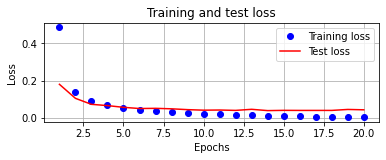

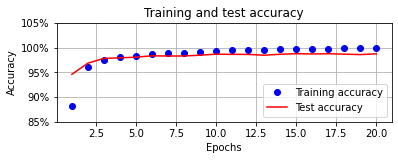

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

14. Fetch the training set corresponding to label `1` only:

In [43]:
X_train1 = X_train[y_train[:,1]==1]
X_train1.shape

(6742, 28, 28, 1)

15. Generate and plot the *average 1 image* from the training set obtained in the previous step. In the following code, we take an average pixel value at each pixel location of images that have a label of 1:

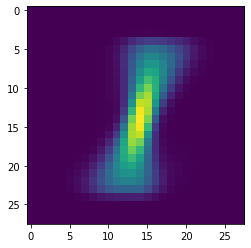

In [44]:
pic=np.zeros((28,28))
for i in range(X_train1.shape[0]):
    pic=pic+X_train1[i,:,:,0]
pic=(pic/X_train1.shape[0])
plt.imshow(pic);

16. Predict the label of the image using the built model. Firstly, we use the `predict` method to calculate the expected output:

In [47]:
X_avg = pic.reshape(1,28,28,1)

In [48]:
pred = model.predict(X_avg)
print(np.shape(pred))
print(pred)

(1, 10)
[[5.4165794e-06 9.9984467e-01 8.1296253e-05 7.2950629e-06 4.7674216e-06
  1.4513024e-06 6.2501050e-07 3.0022726e-05 2.1796905e-05 2.6748678e-06]]


Lastly, we obtain the index that has the highest probability value:

In [49]:
val = np.argmax(pred)
print(val)
print(pred[0,val])

1
0.9998447


### Scenario 1

Let's create a new image where the original image is translated by 1
pixel toward the left. In the following code, we loop through the columns of the image and copy the pixel values of the next column to the current column:

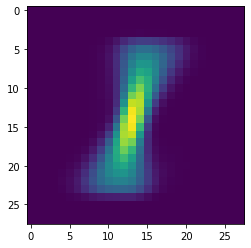

In [51]:
pic1=np.zeros((28,28))
for i in range(pic.shape[0]-1):
    pic1[:,i]=pic[:,i+1]
plt.imshow(pic1);

Predict the label of the new image using the built CNN model:

In [52]:
X_avg1 = pic1.reshape(1,28,28,1)
pred1 = model.predict(X_avg1)
val1 = np.argmax(pred1)
print(val1)
print(pred1[0,val1])

1
0.9969693


We obtain a prediction of 1, with a **close probability** value as compared to the case without translation. Remember that the prediction was obtained with a *lower probability* value in this scenario when using our traditional NN model (value of 0.6800499)!!!

### Scenario 2

A new image is created in which the pixels of the original image are shifted by 2 pixels to the right:

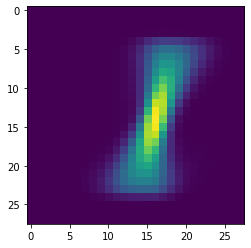

In [53]:
pic2=np.zeros((28,28))
for i in np.arange(2,pic.shape[0]):
    pic2[:,i]=pic[:,i-2]
plt.imshow(pic2);

Predict the label of the new image using the built CNN model:

In [55]:
X_avg2 = pic2.reshape(1,28,28,1)
pred2 = model.predict(X_avg2)
val2 = np.argmax(pred2)
print(val2)
print(pred2[0,val2])

1
0.9957111


We see that the prediction is **correct** (output of 1). Remember that the prediction was *incorrect* in this scenario when using our traditional NN model (output of 3)!!!